In [1]:
import cv2
import tensorflow as tf
#from skimage.exposure import rescale_intensity 
#from skimage.segmentation import slic
#from skimage.util import img_as_float
#from skimage import io 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage import img_as_ubyte
from PIL import Image
import os
import pandas
import skimage

In [ ]:
#(x1, y1)(left, top)
#(x2, y2)(right, bottom)
#(top, right, bottom, left)
#(32, 42, 0, 0)
mypath = "/home/ket/maryam/imgaug/cars/"
#debugging
dirs = os.listdir(mypath)
num_images = len(dirs)
print (num_images)
images_original = []
#images_flip = []
#images_rot15 = []
#images_rot30 = []
#images_rot45 = []
#images_rot15_flip = []
#images_rot30_flip = []
#images_rot45_flip = []
for filename in os.listdir(mypath):
    img = cv2.imread(os.path.join(mypath, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   # print(img)
    if img is not None:
        flip = np.fliplr(img)
        print(flip.dtype)
        rot15 = skimage.transform.rotate(img, angle=15, mode='reflect')
        print(rot15.dtype)
        rot30 = skimage.transform.rotate(img, angle=30, mode='reflect')
        rot45 = skimage.transform.rotate(img, angle=45, mode='reflect')
        
        rot15_flip = np.fliplr(rot15)
        rot30_flip = np.fliplr(rot30)
        rot45_flip = np.fliplr(rot45)
        
        salt_pepper = 0.5
        amount = 0.08
        
        sp_img = np.copy(img_as_ubyte(img))
        num_salt = np.ceil(amount * img.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        sp_img[coords] = 1
        num_pepper = np.ceil(amount* img.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        sp_img[coords] = 0
        sp_img = cv2.cvtColor(sp_img, cv2.COLOR_BGR2RGB)
        
        sp_flip = np.copy(img_as_ubyte(flip))
        num_salt = np.ceil(amount * flip.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in flip.shape]
        sp_flip[coords] = 1
        num_pepper = np.ceil(amount* flip.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in flip.shape]
        sp_flip[coords] = 0
        sp_flip = cv2.cvtColor(sp_flip, cv2.COLOR_BGR2RGB)
        
        sp_rot15 = np.copy(img_as_ubyte(rot15))
        num_salt = np.ceil(amount * rot15.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot15.shape]
        sp_rot15[coords] = 1
        num_pepper = np.ceil(amount* rot15.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot15.shape]
        sp_rot15[coords] = 0
        sp_rot15 = cv2.cvtColor(sp_rot15, cv2.COLOR_BGR2RGB)
        
        sp_rot30 = np.copy(img_as_ubyte(rot30))
        num_salt = np.ceil(amount * rot30.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot30.shape]
        sp_rot30[coords] = 1
        num_pepper = np.ceil(amount* rot30.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot30.shape]
        sp_rot30[coords] = 0
        sp_rot30 = cv2.cvtColor(sp_rot30, cv2.COLOR_BGR2RGB)
        
        sp_rot45 = np.copy(img_as_ubyte(rot45))
        num_salt = np.ceil(amount * rot45.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot45.shape]
        sp_rot45[coords] = 1
        num_pepper = np.ceil(amount* rot45.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot45.shape]
        sp_rot45[coords] = 0
        sp_rot45 = cv2.cvtColor(sp_rot45, cv2.COLOR_BGR2RGB)
        

        sp_rot15_flip = np.copy(img_as_ubyte(rot15_flip))
        num_salt = np.ceil(amount * rot15_flip.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot15_flip.shape]
        sp_rot15_flip[coords] = 1
        num_pepper = np.ceil(amount* rot15_flip.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot15_flip.shape]
        sp_rot15_flip[coords] = 0
        sp_rot15_flip = cv2.cvtColor(sp_rot15_flip, cv2.COLOR_BGR2RGB)
        
        sp_rot30_flip = np.copy(img_as_ubyte(rot30_flip))
        num_salt = np.ceil(amount * rot30_flip.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot30_flip.shape]
        sp_rot30_flip[coords] = 1
        num_pepper = np.ceil(amount* rot30_flip.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot30_flip.shape]
        sp_rot30_flip[coords] = 0
        sp_rot30_flip = cv2.cvtColor(sp_rot30_flip, cv2.COLOR_BGR2RGB)
        
        sp_rot45_flip = np.copy(img_as_ubyte(rot45_flip))
        num_salt = np.ceil(amount * rot45_flip.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot45_flip.shape]
        sp_rot45_flip[coords] = 1
        num_pepper = np.ceil(amount* rot45_flip.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot45_flip.shape]
        sp_rot45_flip[coords] = 0
        sp_rot45_flip = cv2.cvtColor(sp_rot45_flip, cv2.COLOR_BGR2RGB)

 
      #  images_flip.append(flip)
        images_original.append(img)
      #  images_rot15.append(rot15)
        
      #  images_rot_flip.append(rot_flip)
        
        file_name_flip = os.path.join("/home/ket/maryam/imgaug/flipped_cars/", 'flipped_'+filename)
        mpimg.imsave(file_name_flip, flip)
        
        file_name_rot15 = os.path.join("/home/ket/maryam/imgaug/rotated15_cars/", 'rotated15_'+filename)
        mpimg.imsave(file_name_rot15, rot15)
        
        file_name_rot30 = os.path.join("/home/ket/maryam/imgaug/rotated30_cars/", 'rotated30_'+filename)
        mpimg.imsave(file_name_rot30, rot30)
        
        file_name_rot45 = os.path.join("/home/ket/maryam/imgaug/rotated45_cars/", 'rotated45_'+filename)
        mpimg.imsave(file_name_rot45, rot45)
        
        file_name_rot15_flip = os.path.join("/home/ket/maryam/imgaug/rotated15_and_flipped_cars/", 'rotated15_and_flipped_'+filename)
        mpimg.imsave(file_name_rot15_flip, rot15_flip)
        
        file_name_rot30_flip = os.path.join("/home/ket/maryam/imgaug/rotated30_and_flipped_cars/", 'rotated30_and_flipped_'+filename)
        mpimg.imsave(file_name_rot30_flip, rot30_flip)
        
        file_name_rot45_flip = os.path.join("/home/ket/maryam/imgaug/rotated45_and_flipped_cars/", 'rotated45_and_flipped_'+filename)
        mpimg.imsave(file_name_rot45_flip, rot45_flip)
        
        file_name_sp = os.path.join("/home/ket/maryam/imgaug/salt_pepper_cars/", 'salt_pepper_'+filename)
        cv2.imwrite(file_name_sp, sp_img)
        
        file_name_sp_flip = os.path.join("/home/ket/maryam/imgaug/salt_pepper_flipped_cars/", 'salt_pepper_flipped_'+filename)
        cv2.imwrite(file_name_sp_flip, sp_flip)
        
        file_name_sp_rot15 = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated15_cars/", 'salt_pepper_rotated15_'+filename)
        mpimg.imsave(file_name_sp_rot15, sp_rot15)
        
        file_name_sp_rot30 = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated30_cars/", 'salt_pepper_rotated30_'+filename)
        cv2.imwrite(file_name_sp_rot30, sp_rot30)
        
        file_name_sp_rot45 = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated45_cars/", 'salt_pepper_rotated45_'+filename)
        cv2.imwrite(file_name_sp_rot45, sp_rot45)
        
        file_name_sp_rot15_flip = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated15_and_flipped_cars/", 'salt_pepper_rotated15_and_flipped_'+filename)
        cv2.imwrite(file_name_sp_rot15_flip, sp_rot15_flip)
        
        file_name_sp_rot30_flip = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated30_and_flipped_cars/", 'salt_pepper_rotated30_and_flipped_'+filename)
        cv2.imwrite(file_name_sp_rot30_flip, sp_rot30_flip)
        
        file_name_sp_rot45_flip = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated45_and_flipped_cars/", 'salt_pepper_rotated45_and_flipped_'+filename)
        cv2.imwrite(file_name_sp_rot45_flip, sp_rot45_flip)
        
        
        
#for file in dirs:
    #print(file)
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
##images = np.empty (len(onlyfiles))
#for n in range (num_images):
#    image = cv2.imread('*.JPG')
#    print(image)
#Folder_name = "augmented_image"
#Extension = ".JPG"

# RESIZE
# def resize_image(image, w, h):
#     image=cv2.resize(image(w, h))
#     cv2.imwrite(Folder_name+"/Resize-"+str(w)"+"str(h)+Extension, image)


In [13]:
mypath = "/home/ket/maryam/imgaug/cars/"
#debugging
dirs = os.listdir(mypath)
num_images = len(dirs)
print (num_images)
images_original = []
#images_flip = []
#images_rot15 = []
#images_rot30 = []
#images_rot45 = []
#images_rot15_flip = []
#images_rot30_flip = []
#images_rot45_flip = []
for filename in os.listdir(mypath):
    img = cv2.imread(os.path.join(mypath, filename))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   # print(img)
    if img is not None:
        images_original.append(img)
        rot15 = skimage.transform.rotate(img, angle=15, mode='reflect')
        salt_pepper = 0.5
        amount = 0.08
        sp_rot15 = np.copy(img_as_ubyte(rot15))
        num_salt = np.ceil(amount * rot15.size * salt_pepper)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot15.shape]
        sp_rot15[coords] = 1
        num_pepper = np.ceil(amount* rot15.size * (1. - salt_pepper))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot15.shape]
        sp_rot15[coords] = 0
        #sp_rot15 = cv2.cvtColor(sp_rot15, cv2.COLOR_RGB2BGR)
        file_name_sp_rot15 = os.path.join("/home/ket/maryam/imgaug/salt_pepper_rotated15_cars/", 'salt_pepper_rotated15_'+filename)
        cv2.imwrite(file_name_sp_rot15, sp_rot15)

240


/home/ket/anaconda3/envs/imgaug/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ket/anaconda3/envs/imgaug/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


240


/home/ket/anaconda3/envs/imgaug/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/home/ket/anaconda3/envs/imgaug/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


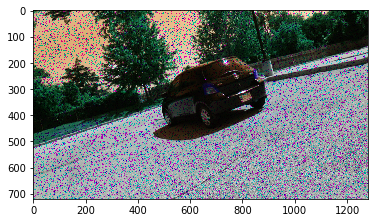

In [12]:
n = len(images_original)
print(n)
image = images_original[45]
#plt.imshow(image)
rot15 = skimage.transform.rotate(image, angle=15, mode='reflect')
sp_rot15 = np.copy(img_as_ubyte(rot15))

salt_pepper = 0.5
amount = 0.08
num_salt = np.ceil(amount * rot15.size * salt_pepper)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in rot15.shape]
sp_rot15[coords] = 1
num_pepper = np.ceil(amount* rot15.size * (1. - salt_pepper))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in rot15.shape]
sp_rot15[coords] = 0
#sp_rot15 = cv2.cvtColor(sp_rot15, cv2.COLOR_RGB2BGR)
cv2.imwrite("proper-color.jpg", sp_rot15)

plt.imshow(sp_rot15)

In [ ]:
image = images_original[45]
flip_1 = np.fliplr(image)
plt.imshow (flip_1)
plt.show()
mpimg.imsave("test-save.png", flip_1)
cv2.imwrite("test-save2.jpg", flip_1)



In [ ]:
image = images_original[45]

rot = skimage.transform.rotate(image, angle=15, mode='reflect')
plt.imshow(rot)
mpimg.imsave("test-save.jpg", rot)
cv2.imwrite("test-save2.jpg", rot)

In [ ]:
image = images_original[45]

rot = skimage.transform.rotate(image, angle=30, mode='reflect')
plt.imshow(rot)
mpimg.imsave("test-save.jpg", rot)
cv2.imwrite("test-save3.jpg", rot)

In [ ]:
image = images_original[45]
plt.imshow(image)
row, col, ch = image.shape
mean = 0
var = 0.0001
sigma = var**0.5
gauss = np.random.normal(mean, sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = image + gauss
plt.imshow(noisy)
mpimg.imsave("test-save.jpg", noisy)
cv2.imwrite("test-save2.jpg", noisy)

In [ ]:
from skimage import img_as_ubyte

mypath = "/home/ket/maryam/imgaug/cars/"
#debugging
dirs = os.listdir(mypath)
num_images = len(dirs)
print (num_images)
images_original = []
#images_flip = []
#images_rot15 = []
#images_rot30 = []
#images_rot45 = []
#images_rot15_flip = []
#images_rot30_flip = []
#images_rot45_flip = []
for filename in os.listdir(mypath):
    img = cv2.imread(os.path.join(mypath, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   # print(img)
    if img is not None:
        images_original.append(img)


image = images_original[45]

rot15 = skimage.transform.rotate(image, angle=15, mode='reflect')
print (rot15.dtype)
rot15 = img_as_ubyte(rot15)
#row, col, ch = image.shape
print (rot15.dtype)

salt_pepper = 0.5
amount = 0.08
out = np.copy(rot15)
num_salt = np.ceil(amount * image.size * salt_pepper)

coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
out[coords] = 1

      # Pepper mode
num_pepper = np.ceil(amount* image.size * (1. - salt_pepper))
coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
out[coords] = 0
print (out.dtype)

out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
print (out.dtype)
#cv2.imshow('noisy', out)
cv2.imwrite('test2.jpg', out)


In [ ]:
image = images_original[45]

imshape = image.shape
batch = 1
height = imshape[0]
width = imshape[1]
channels = 3

pad_top = 10
pad_left = 10
pad_bottom = 10
pad_right = 20

shape = [batch, height, width, channels]
x = tf.placeholder(dtype = tf.float32, shape = shape)

        # We use two functions to get our desired augmentation
x = tf.image.pad_to_bounding_box(x, pad_top, pad_left, height + pad_bottom + pad_top, width + pad_right + pad_left)
output = tf.image.crop_to_bounding_box(x, pad_bottom, pad_right, height, width)
output = tf.cast(output, tf.uint16)
output = tf.squeeze(output, axis=[0])

output_image = tf.image.encode_png(output)
output_image = tf.cast(output_image, tf.float32)

#print(outpute)

cv2.imwrite('image.jpg',output_image)

In [ ]:
import cv2
import tensorflow as tf
#from skimage.exposure import rescale_intensity 
#from skimage.segmentation import slic
#from skimage.util import img_as_float
#from skimage import io 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from PIL import Image
import os
import pandas
import skimage